In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model,Model
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
import cv2
import glob
import os
from sklearn.model_selection import train_test_split
from keras.applications import *
import keras

In [12]:
def class_labels_reassign(age):

    if 0 <= age <= 10:
        return 0
    elif 11 <= age <= 20:
        return 1
    elif 21 <= age <= 30:
        return 2
    elif 31 <= age <= 40:
        return 3
    elif 41 <= age <= 50:
        return 4
    elif 51 <= age <= 60:
        return 5
    elif 61 <= age <= 70:
        return 6
    elif 71 <= age <= 80:
        return 7
    elif 81 <= age <= 90:
        return 8
    elif 91 <= age <= 116:
        return 9

In [13]:
age = []
Images = []
for i in glob.glob('UTKFace/*.jpg'):
    if os.path.exists(i):
        x = int(i.split('\\')[1].split('_')[0])
        # if x >=0 :
        age.append(x)
        Images.append(i)

In [14]:
max(age)

116

In [15]:
age = np.array(age)
len(np.unique(age))

104

In [16]:
x_train, x_test, y_train, y_test = train_test_split(Images, age, train_size=0.8, shuffle=True, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.85, shuffle=True, random_state=0)

In [17]:
data_gen = ImageDataGenerator(rescale=1./255)
df_train = pd.DataFrame({'filename': x_train, 'age': y_train})
df_train['age'] = df_train['age']
df_train['filename'] = df_train['filename'].astype('str')
# df_train['target'] = df_train['age'].map(class_labels_reassign) 
# df_train['target'] = df_train['target'].astype('str')
train = data_gen.flow_from_dataframe(df_train, x_col='filename',y_col='age', target_size=(120, 120), batch_size=8, color_mode='rgb', class_mode='raw')

Found 16121 validated image filenames.


In [18]:
df_test = pd.DataFrame({'filename': x_test, 'age': y_test})
df_test['age'] = df_test['age']
df_test['filename'] = df_test['filename'].astype('str')
# df_test['target'] = df_test['age'].map(class_labels_reassign) 
# df_test['target'] = df_test['target'].astype('str')
test = data_gen.flow_from_dataframe(df_test, x_col='filename', y_col='age', target_size=(120, 120), batch_size=8, color_mode='rgb', class_mode='raw')

Found 4742 validated image filenames.


In [19]:
df_val = pd.DataFrame({'filename': x_val, 'age': y_val})
df_val['age'] = df_val['age']
df_val['filename'] = df_val['filename'].astype('str')
# df_val['target'] = df_val['age'].map(class_labels_reassign) 
# df_val['target'] = df_val['target'].astype('str')
val = data_gen.flow_from_dataframe(df_val, x_col='filename',y_col='age', target_size=(120, 120), batch_size=8, color_mode='rgb', class_mode='raw')

Found 2845 validated image filenames.


In [21]:
# final_cnn = Sequential()

# # Input layer with 32 filters, followed by an AveragePooling2D layer.
# final_cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(120, 120, 3)))    # 3rd dim = 1 for grayscale images.
# final_cnn.add(AveragePooling2D(pool_size=(2,2)))

# # Three Conv2D layers with filters increasing by a factor of 2 for every successive Conv2D layer.
# final_cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
# final_cnn.add(AveragePooling2D(pool_size=(2,2)))

# final_cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
# final_cnn.add(AveragePooling2D(pool_size=(2,2)))

# final_cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
# final_cnn.add(AveragePooling2D(pool_size=(2,2)))

# # A GlobalAveragePooling2D layer before going into Dense layers below.
# # GlobalAveragePooling2D layer gives no. of outputs equal to no. of filters in last Conv2D layer above (256).
# final_cnn.add(GlobalAveragePooling2D())

# # One Dense layer with 132 nodes so as to taper down the no. of nodes from no. of outputs of GlobalAveragePooling2D layer above towards no. of nodes in output layer below (7).
# final_cnn.add(Dense(132, activation='relu'))

# # Output layer with 7 nodes (equal to the no. of classes).
# final_cnn.add(Dense(11, activation='softmax'))
# final_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Fitting the above created CNN model.

# final_cnn_history = final_cnn.fit(train,validation_data=val,epochs=60)


# gender_model = Sequential()

# gender_model.add(Conv2D(24, kernel_size=3, activation='relu', input_shape=(200,200,1)))

# gender_model.add(MaxPool2D(pool_size=3, strides=2))
# gender_model.add(Conv2D(64, kernel_size=3, activation='relu'))
# gender_model.add(MaxPool2D(pool_size=3, strides=2))

# gender_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# gender_model.add(MaxPool2D(pool_size=3, strides=2))

# gender_model.add(Conv2D(256, kernel_size=3, activation='relu'))
# gender_model.add(MaxPool2D(pool_size=3, strides=2))

# gender_model.add(Conv2D(512, kernel_size=3, activation='relu'))
# gender_model.add(MaxPool2D(pool_size=3, strides=2))

# # gender_model.add(Conv2D(1024, kernel_size=3, activation='relu'))
# # gender_model.add(MaxPool2D(pool_size=3, strides=2))

# gender_model.add(Flatten())
# gender_model.add(Dropout(0.2))
# gender_model.add(Dense(512, activation='relu'))
# gender_model.add(Dense(10, activation='softmax', name='gender'))
# print(gender_model.summary())
# gender_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# history_gender = gender_model.fit(train,
#                         validation_data=(val), epochs=20, callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True))







# age_model = Sequential()
# age_model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(120,120,1)))
# #age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# age_model.add(MaxPool2D(pool_size=3, strides=2))

# age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# #age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# age_model.add(MaxPool2D(pool_size=3, strides=2))
              
# age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
# #age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
# age_model.add(MaxPool2D(pool_size=3, strides=2))

# age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
# #age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
# age_model.add(MaxPool2D(pool_size=3, strides=2))

# age_model.add(Flatten())
# age_model.add(Dropout(0.2))
# age_model.add(Dense(512, activation='relu'))

# age_model.add(Dense(1, activation='linear', name='age'))
              
# age_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# print(age_model.summary())              
                           
# history_age = age_model.fit(train,
#                         validation_data=(val), epochs=50)





# gender_model = Sequential()

# gender_model.add(Conv2D(24, kernel_size=3, activation='relu', input_shape=(120,120,1)))

# gender_model.add(MaxPool2D(pool_size=3, strides=2))
# gender_model.add(Conv2D(64, kernel_size=3, activation='relu'))
# gender_model.add(MaxPool2D(pool_size=3, strides=2))

# gender_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# gender_model.add(MaxPool2D(pool_size=3, strides=2))

# gender_model.add(Conv2D(256, kernel_size=3, activation='relu'))
# gender_model.add(MaxPool2D(pool_size=3, strides=2))

# # gender_model.add(Conv2D(512, kernel_size=3, activation='relu'))
# # gender_model.add(MaxPool2D(pool_size=3, strides=2))

# # gender_model.add(Conv2D(1024, kernel_size=3, activation='relu'))
# # gender_model.add(MaxPool2D(pool_size=3, strides=2))

# gender_model.add(Flatten())
# gender_model.add(Dropout(0.2))
# gender_model.add(Dense(1024, activation='relu'))
# gender_model.add(Dense(1, activation='linear', name='gender'))
# print(gender_model.summary())
# gender_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# history_gender = gender_model.fit(train,
#                         validation_data=(val), epochs=50,  callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=25, restore_best_weights=True))






model = VGG19(input_shape=(120, 120, 3), include_top=False)

for layer in model.layers:
    layer.trainable = False
    

# Classification Model
f1 = GlobalMaxPooling2D()(model.output)
x = model.output
f1 = Flatten()(x)
# class1 = Dense(512, activation='relu')(f1)
class1 = Dropout(0.2)(f1)
class2 = Dense(1, activation='linear', name='gender')(class1)

model = Model(inputs=model.input, outputs= class2)
#model.summary()
model.compile(loss=['mse'], optimizer='adam', metrics=['accuracy'])
history = model.fit(train, epochs=500,validation_data=(val))


Epoch 1/500
2016/2016 [==============================] - 38s 18ms/step - loss: 256.5029 - accuracy: 0.0417 - val_loss: 197.4681 - val_accuracy: 0.0394
Epoch 2/500
2016/2016 [==============================] - 36s 18ms/step - loss: 191.4765 - accuracy: 0.0365 - val_loss: 177.7034 - val_accuracy: 0.0313
Epoch 3/500
2016/2016 [==============================] - 36s 18ms/step - loss: 177.0327 - accuracy: 0.0348 - val_loss: 168.7432 - val_accuracy: 0.0320
Epoch 4/500
2016/2016 [==============================] - 36s 18ms/step - loss: 168.7031 - accuracy: 0.0344 - val_loss: 164.4559 - val_accuracy: 0.0316
Epoch 5/500
2016/2016 [==============================] - 36s 18ms/step - loss: 165.0827 - accuracy: 0.0341 - val_loss: 161.5390 - val_accuracy: 0.0327
Epoch 6/500
2016/2016 [==============================] - 36s 18ms/step - loss: 160.9446 - accuracy: 0.0342 - val_loss: 159.4004 - val_accuracy: 0.0278
Epoch 7/500
2016/2016 [==============================] - 36s 18ms/step - loss: 157.4336 - accu

KeyboardInterrupt: 

In [42]:
gender_model.predict()

0       50
1       18
2       16
3        3
4       47
        ..
2840    53
2841    30
2842    56
2843    29
2844     8
Name: age, Length: 2845, dtype: object

1/1 [==============================] - 0s 384ms/step


array([[46.02379]], dtype=float32)

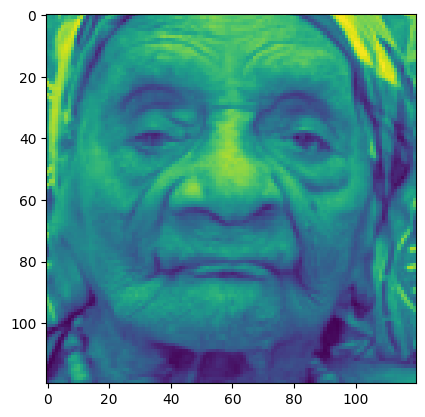

In [16]:
img = cv2.imread(r"F:\ai\Age & Gendder Detection\UTKFace\116_1_3_20170120134744096.jpg.chip.jpg")
img = cv2.resize(img, (120, 120))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
img = np.array(img)/255
img = img.reshape(1, 120, 120, 1)
gender_model.predict(img)

In [ ]:
plt.plot(history_gender.history['accuracy'])
plt.plot(history_gender.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss over time
plt.plot(gender_model.history['loss'])
plt.plot(history_gender.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 21ms/step


1.4754587784409523

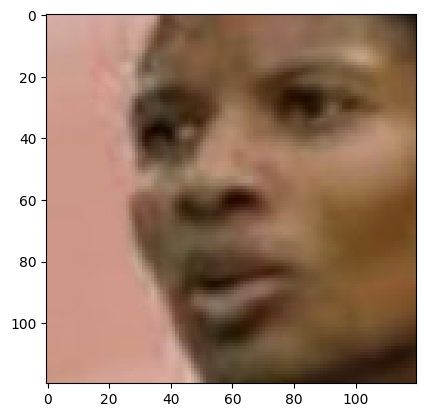

In [63]:
img = cv2.imread(r"F:\ai\Age & Gendder Detection\UTKFace\35_1_1_20170116165647705.jpg.chip.jpg")
img = cv2.resize(img, (120, 120))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img = np.array(img)/255
img = img.reshape(1, 120, 120, 3)

age_model.predict(img)[0][0]*100